In [87]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import files

In [88]:
#Load the data
flowers_data=pd.read_csv('/content/IRIS_ Flower_Dataset.csv')

In [89]:
print(flowers_data.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [90]:
flowers_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [91]:
# Split the data into features (X) and target variable (y)
X = flowers_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = flowers_data['species']

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [93]:
# Model 1: Support Vector Machine (SVM)
modelSVM = SVC(kernel='linear', C=1, random_state=42)
# Model 2: Random Forest
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

In [94]:
# Train the model
modelSVM.fit(X_train,y_train)


SVC(C=1, kernel='linear', random_state=42)

In [95]:
# Train the model

modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:

# Make predictions on the test set
y_predSVM = modelSVM.predict(X_test)
y_predRF = modelRF.predict(X_test)


In [97]:
# Evaluate the model
accuracySVM = accuracy_score(y_test, y_predSVM)
reportSVM = classification_report(y_test, y_predSVM)

accuracyRF = accuracy_score(y_test, y_predRF)
reportRF = classification_report(y_test, y_predRF)

print(f"Accuracy: {accuracySVM:.2f}")
print("\nClassification Report:\n", reportSVM)



print(f"Accuracy: {accuracyRF:.2f}")
print("\nClassification Report:\n", reportRF)



Accuracy: 0.95

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38

Accuracy: 0.89

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.91      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [98]:



# Save the model
joblib.dump(modelRF, 'flower_classifier_model.pkl')

# Upload the saved model to GitHub
files.download('flower_classifier_model.pkl')



"\n# Save the model\njoblib.dump(modelRF, 'flower_classifier_model.pkl')\n\n# Upload the saved model to GitHub\nfiles.download('flower_classifier_model.pkl')\n"

In [99]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
flowers_data = pd.read_csv('/content/IRIS_ Flower_Dataset.csv')

print(flowers_data.isnull().sum())

flowers_data.columns

flowers_data.info()
flowers_data.head(10)
flowers_data.describe()

# Pairplots with curves showing the distribution of features by species
plt.figure(figsize=(15, 10))

# Pairplot for sepal_length, sepal_width, petal_length, and petal_width
pairplot = sns.pairplot(flowers_data, hue='species', markers=["o", "s", "D"], palette="Set2", height=2, diag_kind='kde')

plt.suptitle("Pairplots with KDE for Iris Features by Species", y=1.02)
plt.show()


# Boxplot for univariate analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=flowers_data)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=flowers_data)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=flowers_data)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=flowers_data)
plt.suptitle("Boxplots of Iris Features by Species")
plt.show()



# Encodage des espèces en numérique pour la corrélation
flowers_data['species_encoded'] = flowers_data['species'].astype('category').cat.codes

# Correlation Matrix
corr_matrix_species = flowers_data.corrwith(flowers_data['species_encoded'])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_species.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation Matrix Heatmap with 'species'")
plt.show()


# Model: Support Vector Machine (SVM) with GridSearchCV for hyperparameter tuning
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3)
grid_search_svm.fit(X, y)

best_params_svm = grid_search_svm.best_params_
best_model_svm = SVC(**best_params_svm)

# Cross-validation for SVM
cv_scores_svm = cross_val_score(best_model_svm, X, y, cv=3)
print("Cross-validated SVM Accuracy:", cv_scores_svm.mean())

# Train the SVM model on the full training set
best_model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_predSVM = best_model_svm.predict(X_test)

# Evaluate the SVM model
accuracySVM = accuracy_score(y_test, y_predSVM)
reportSVM = classification_report(y_test, y_predSVM)

print("Best Parameters for SVM:", best_params_svm)
print(f"Accuracy (SVM): {accuracySVM:.2f}")
print("\nClassification Report (SVM):\n", reportSVM)


# Save the SVM model
joblib.dump(best_model_svm, 'best_svm_model.pkl')

# Upload the saved model to GitHub
files.download('best_svm_model.pkl')


# Plotting training and validation accuracy over epochs for SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Calculate the training accuracy
train_accuracy = best_model_svm.score(X_train, y_train)
plt.plot([train_accuracy] * len(param_grid_svm['C']), label='Training Accuracy')

# Plotting the mean validation accuracy obtained from GridSearchCV
plt.plot(grid_search_svm.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.title('SVM Training and Validation Accuracy Over Hyperparameter Grid')
plt.xlabel('Hyperparameter Grid Index')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# Function to plot learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve
plot_learning_curve(best_model_svm, "SVM Learning Curve", X, y, cv=3)



# Plotting confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predSVM), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()"""

'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport joblib\nfrom google.colab import files\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Load the data\nflowers_data = pd.read_csv(\'/content/IRIS_ Flower_Dataset.csv\')\n\nprint(flowers_data.isnull().sum())\n\nflowers_data.columns\n\nflowers_data.info()\nflowers_data.head(10)\nflowers_data.describe()\n\n# Pairplots with curves showing the distribution of features by species\nplt.figure(figsize=(15, 10))\n\n# Pairplot for sepal_length, sepal_width, petal_length, and petal_width\npairplot = sns.pairplot(flowers_data, hue=\'species\', markers=["o", "s", "D"], palette="Set2", height=2, diag_kind=\'kde\')\n\nplt.suptitle("Pairplots with KDE for Iris Features by Species", y=1.02)\nplt.show()\n\n\n# Boxplot for univariate analysis\nplt.figure(figsize=(12,

In [100]:
flowers_data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [101]:
flowers_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [102]:
print(flowers_data.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# Assuming X, y, X_train, X_test, y_train, y_test are defined before this code block


param_grid_svm = {
    'C': [0.1, 0.98, 1, 1.02, 1.05, 2, 5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.0001,0.001, 0.002,0.005,0.008, 0.01, 0.1, 0.5, 1, 2,3],
}


grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3)

print("Performing grid search with SVM. This may take a while...")

# Loop through each combination of hyperparameters and print the values being tested
for C_val in param_grid_svm['C']:
    for kernel_val in param_grid_svm['kernel']:
      for gamma_val in param_grid_svm['gamma']:
              print(f"Testing: C={C_val}, kernel={kernel_val}, gamma={gamma_val}")
              grid_search_svm.fit(X, y)

print("Grid search completed.")

# Print the best parameters and the corresponding accuracy
print("Best parameters found: ", grid_search_svm.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_svm.best_score_))
print("Test set accuracy: {:.2f}".format(grid_search_svm.score(X_test, y_test)))

best_params_svm = grid_search_svm.best_params_
best_model_svm = SVC(**best_params_svm)

# Train the SVM model on the full training set
best_model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_predSVM = best_model_svm.predict(X_test)

# Evaluate the SVM model
accuracySVM = accuracy_score(y_test, y_predSVM)
reportSVM = classification_report(y_test, y_predSVM)

print("Best Parameters for SVM:", best_params_svm)
print(f"Accuracy (SVM): {accuracySVM:.2f}")
print("\nClassification Report (SVM):\n", reportSVM)


Performing grid search with SVM. This may take a while...
Testing: C=0.1, kernel=linear, gamma=0.0001
Testing: C=0.1, kernel=linear, gamma=0.001
Testing: C=0.1, kernel=linear, gamma=0.002
Testing: C=0.1, kernel=linear, gamma=0.005
Testing: C=0.1, kernel=linear, gamma=0.008
Testing: C=0.1, kernel=linear, gamma=0.01
Testing: C=0.1, kernel=linear, gamma=0.1
Testing: C=0.1, kernel=linear, gamma=0.5
Testing: C=0.1, kernel=linear, gamma=1
Testing: C=0.1, kernel=linear, gamma=2
Testing: C=0.1, kernel=linear, gamma=3
Testing: C=0.1, kernel=rbf, gamma=0.0001
Testing: C=0.1, kernel=rbf, gamma=0.001
Testing: C=0.1, kernel=rbf, gamma=0.002
Testing: C=0.1, kernel=rbf, gamma=0.005
Testing: C=0.1, kernel=rbf, gamma=0.008
Testing: C=0.1, kernel=rbf, gamma=0.01
Testing: C=0.1, kernel=rbf, gamma=0.1
Testing: C=0.1, kernel=rbf, gamma=0.5
Testing: C=0.1, kernel=rbf, gamma=1
Testing: C=0.1, kernel=rbf, gamma=2
Testing: C=0.1, kernel=rbf, gamma=3
Testing: C=0.98, kernel=linear, gamma=0.0001
Testing: C=0.98,

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Figure size 1500x1000 with 0 Axes>

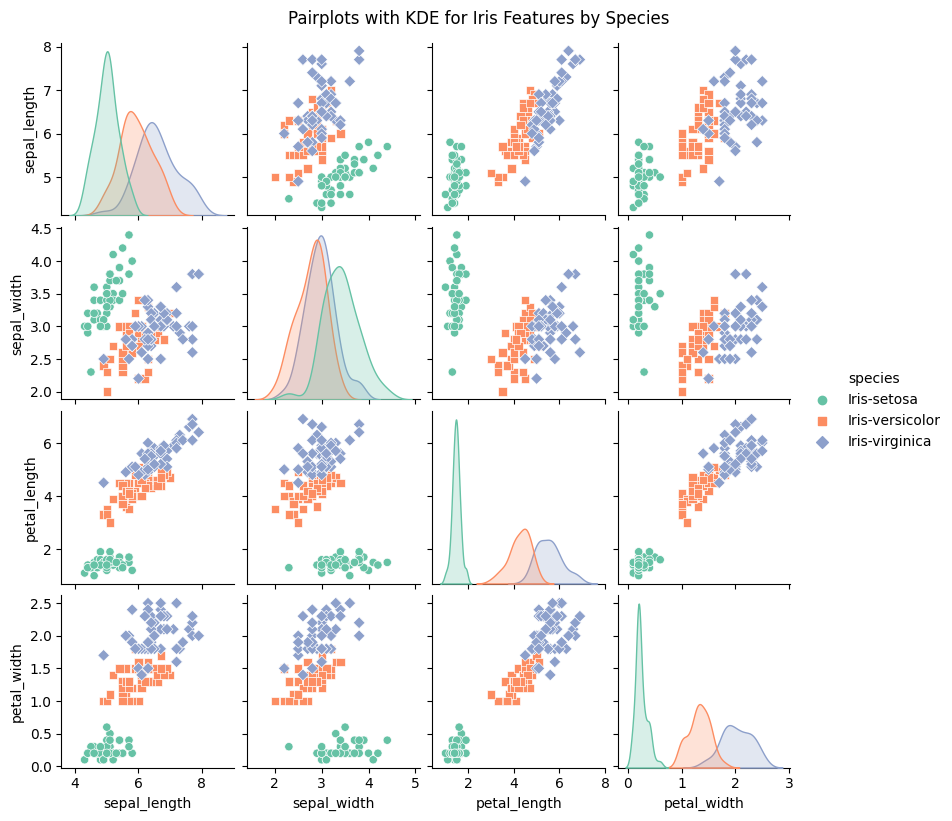

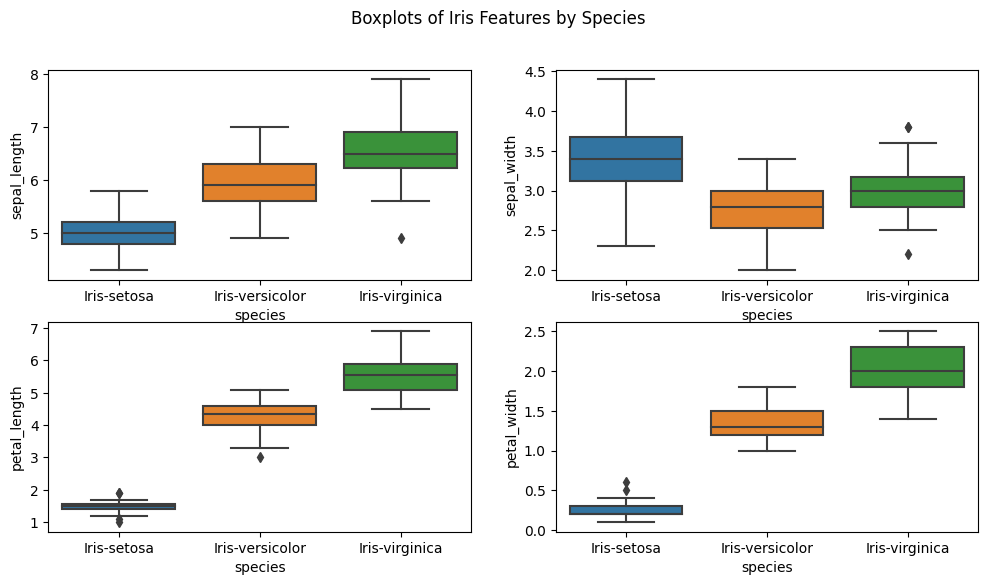

<ipython-input-104-1c1711b76ff0>:52: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_species = flowers_data.corrwith(flowers_data['species_encoded'])


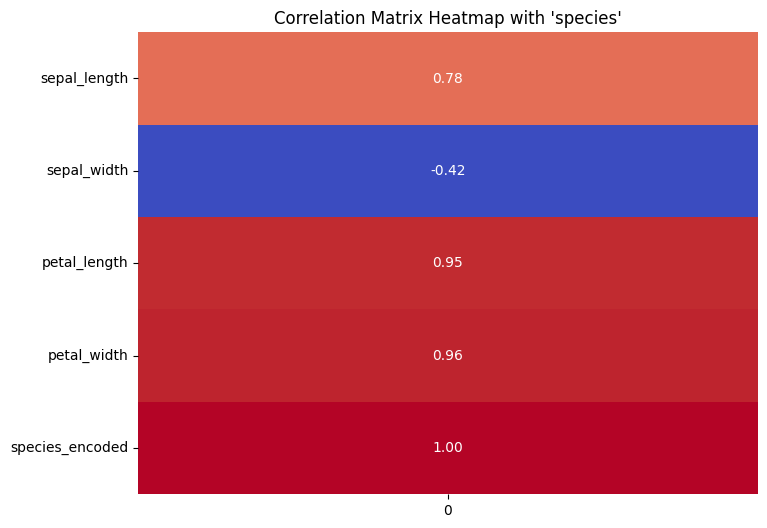

Cross-validated SVM Accuracy: 0.9933333333333333
Best Parameters for SVM: {'C': 0.98, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy (SVM): 0.95

Classification Report (SVM):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



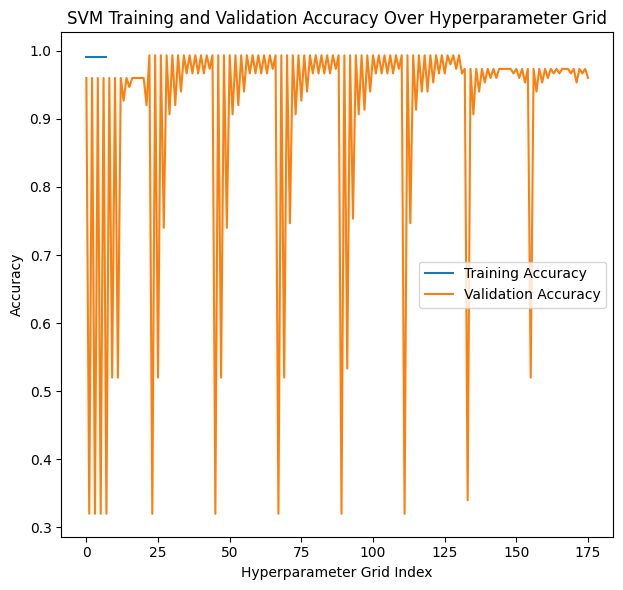

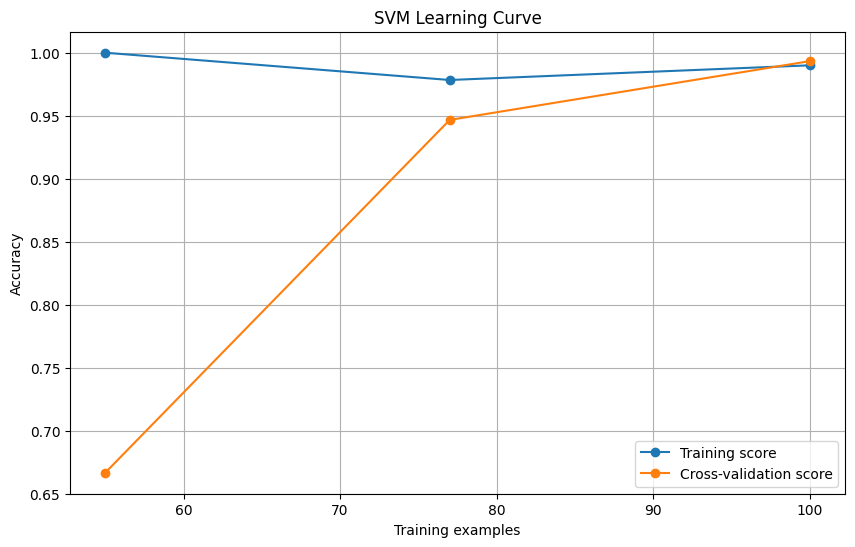

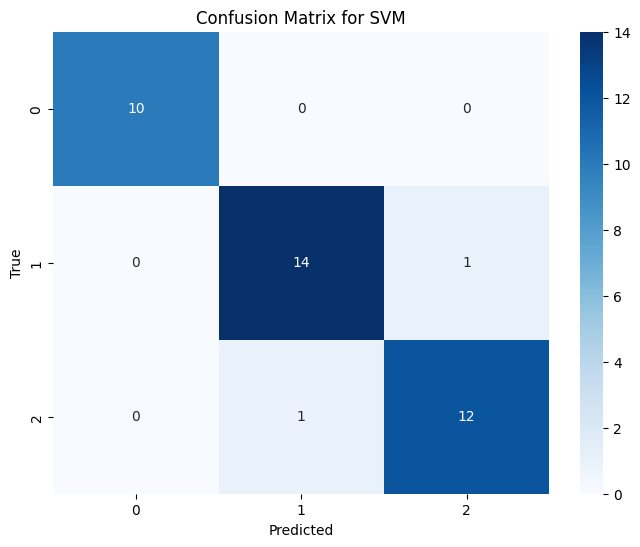

In [104]:
best_params=best_params_svm

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
flowers_data = pd.read_csv('/content/IRIS_ Flower_Dataset.csv')

print(flowers_data.isnull().sum())

flowers_data.columns

flowers_data.info()
flowers_data.head(10)
flowers_data.describe()

# Pairplots with curves showing the distribution of features by species
plt.figure(figsize=(15, 10))

# Pairplot for sepal_length, sepal_width, petal_length, and petal_width
pairplot = sns.pairplot(flowers_data, hue='species', markers=["o", "s", "D"], palette="Set2", height=2, diag_kind='kde')

plt.suptitle("Pairplots with KDE for Iris Features by Species", y=1.02)
plt.show()


# Boxplot for univariate analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=flowers_data)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=flowers_data)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=flowers_data)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=flowers_data)
plt.suptitle("Boxplots of Iris Features by Species")
plt.show()



# Encodage des espèces en numérique pour la corrélation
flowers_data['species_encoded'] = flowers_data['species'].astype('category').cat.codes

# Correlation Matrix
corr_matrix_species = flowers_data.corrwith(flowers_data['species_encoded'])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_species.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation Matrix Heatmap with 'species'")
plt.show()


# Cross-validation for SVM
cv_scores_svm = cross_val_score(best_model_svm, X, y, cv=3)
print("Cross-validated SVM Accuracy:", cv_scores_svm.mean())

# Train the SVM model on the full training set
best_model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_predSVM = best_model_svm.predict(X_test)

# Evaluate the SVM model
accuracySVM = accuracy_score(y_test, y_predSVM)
reportSVM = classification_report(y_test, y_predSVM)

print("Best Parameters for SVM:", best_params_svm)
print(f"Accuracy (SVM): {accuracySVM:.2f}")
print("\nClassification Report (SVM):\n", reportSVM)

"""
# Save the SVM model
joblib.dump(best_model_svm, 'best_svm_model.pkl')

# Upload the saved model to GitHub
files.download('best_svm_model.pkl')
"""

# Plotting training and validation accuracy over epochs for SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Calculate the training accuracy
train_accuracy = best_model_svm.score(X_train, y_train)
plt.plot([train_accuracy] * len(param_grid_svm['C']), label='Training Accuracy')

# Plotting the mean validation accuracy obtained from GridSearchCV
plt.plot(grid_search_svm.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.title('SVM Training and Validation Accuracy Over Hyperparameter Grid')
plt.xlabel('Hyperparameter Grid Index')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# Function to plot learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve
plot_learning_curve(best_model_svm, "SVM Learning Curve", X, y, cv=3)



# Plotting confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predSVM), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

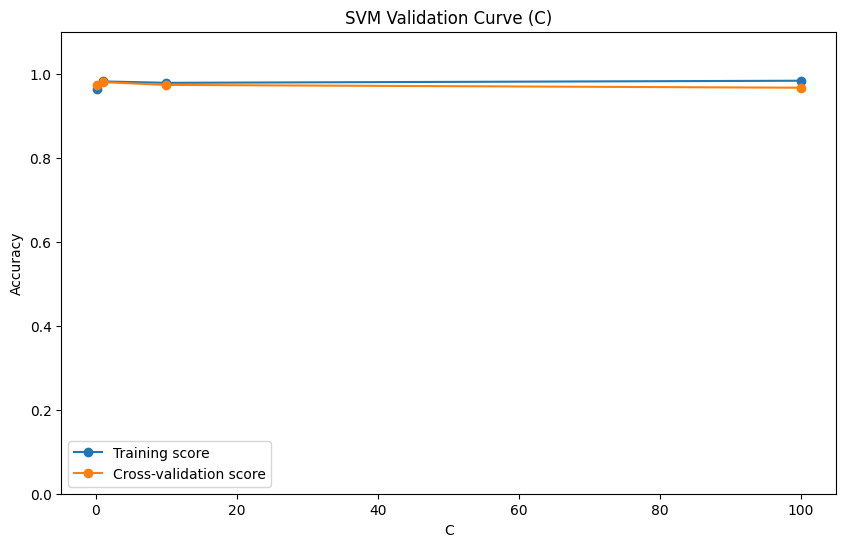

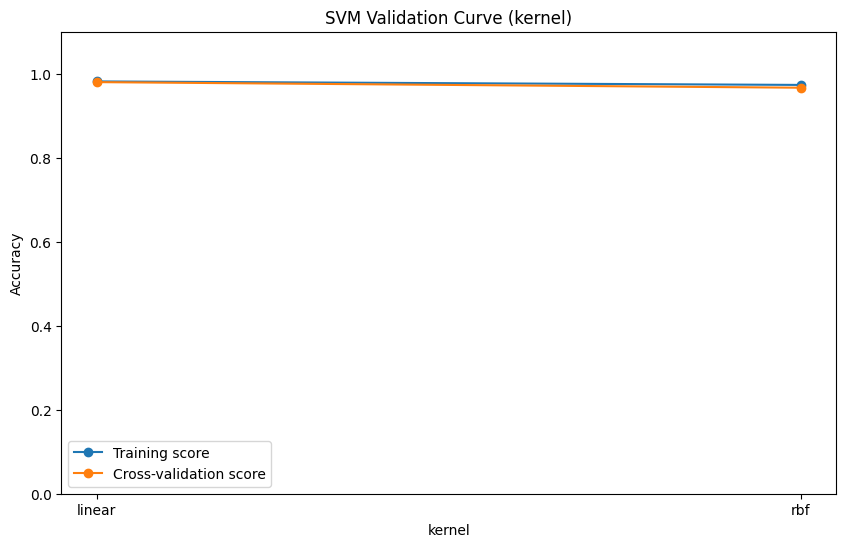

In [105]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, 'o-', label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Define hyperparameter values to test
param_range_svm_C = [0.1, 1, 10, 100]
param_range_svm_kernel = ['linear', 'rbf']

# Plot validation curve for SVM hyperparameter 'C'
plot_validation_curve(SVC(kernel='linear'), "SVM Validation Curve (C)", X, y, param_name='C', param_range=param_range_svm_C, cv=5)

# Plot validation curve for SVM hyperparameter 'kernel'
plot_validation_curve(SVC(C=1), "SVM Validation Curve (kernel)", X, y, param_name='kernel', param_range=param_range_svm_kernel, cv=5)


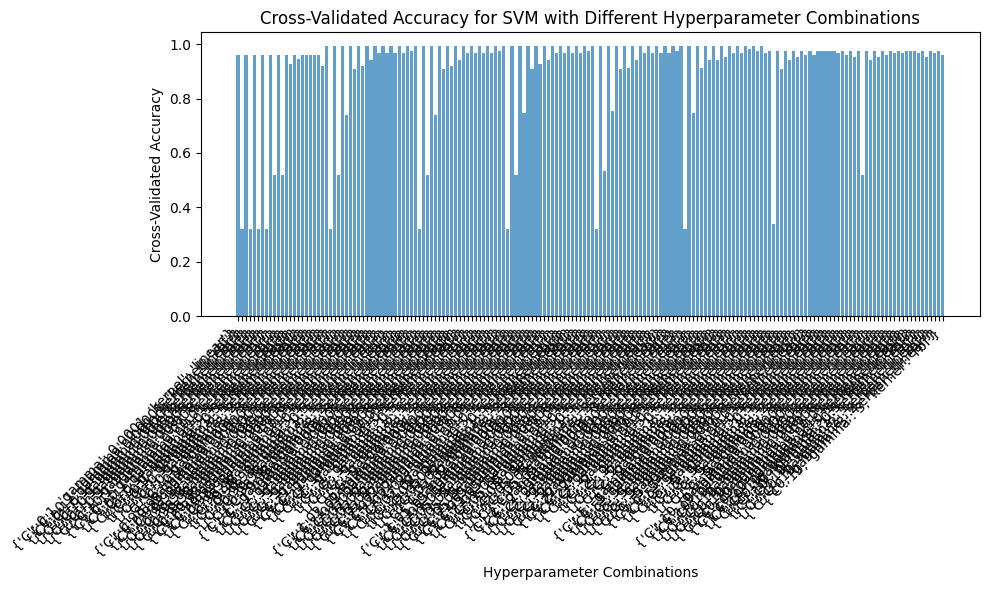

In [106]:
# Plotting cross-validation scores for SVM
plt.figure(figsize=(10, 6))
param_combinations = range(len(grid_search_svm.cv_results_['params']))

plt.bar(param_combinations, grid_search_svm.cv_results_['mean_test_score'], align='center', alpha=0.7)
plt.xticks(param_combinations, [str(params) for params in grid_search_svm.cv_results_['params']], rotation=45, ha='right')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy for SVM with Different Hyperparameter Combinations')

plt.tight_layout()
plt.show()